In [1]:
from peerless.catalogs import TargetCatalog, EBCatalog
targets = TargetCatalog().df

bad = targets.mass.isnull()
targets.loc[bad, 'mass'] = targets.loc[bad, 'radius']

In [2]:
%run ../peerless/plot_setup.py

In [3]:
import numpy as np
from exosyspop.populations import PlanetPopulation, REARTH, RSUN

import astropy.constants as const
RJUP = const.R_jup.cgs

class SimplePlanetPopulation(PlanetPopulation):
    """ Simple planet population for testing purposes
    
    Every star has exactly one planet.
    All periods at a single period. 
    All radii at a single radius.
    All circular orbits.
    """
    single_period = 1*365.25
    single_R = 1*RJUP/RSUN
    
    param_names = ()
    default_params = {}
    
    def _sample_ecc(self, N):
        return np.zeros(N)
    
    def _sample_period(self, N):
        return np.ones(N)*self.single_period
    
    def _sample_Np(self, N):
        return np.ones(N)
        
    def _sample_Rp(self, N):
        return np.ones(N)*self.single_R

In [4]:
# Use an idealized population with all dutycycle=1
targets_ideal = targets.copy()
targets_ideal.dutycycle = 1.

plpop = SimplePlanetPopulation(targets_ideal)

In [5]:
# This is the expected number of detections: number of stars * average transit probability
p_ecl = (1./plpop.aR) * (1+plpop.radius_B/plpop.radius_A)  # R*/a corrected for grazing eclipses
n_exp = len(targets) * p_ecl.mean()
n_exp

/Users/tdm/repositories/exosyspop/exosyspop/populations.py:1541: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  i_host = np.zeros(Ntot, dtype=int)
/Users/tdm/repositories/exosyspop/exosyspop/populations.py:1544: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  i_host[i:i+n] = ix
/Users/tdm/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


181.17077719089406

In [6]:
n_obs = [len(plpop.observe(new_orbits=True, regr_trap=True).query('d_pri > 0')) for i in range(100)]

Planet: Depth trained: R2=0.999862111038
Planet: Duration trained: R2=0.999838731564
Planet: Slope trained: R2=0.999369985322


/Users/tdm/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


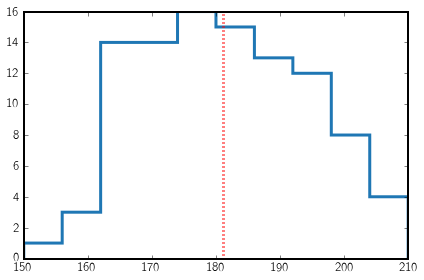

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(n_obs, histtype='step', lw=3);
plt.axvline(n_exp, color='r', ls=':', lw=3)

In [8]:
np.mean(n_obs)

181.13999999999999